In [1]:
%cd ../..

/home/work/AnacondaProjects/combinators


In [2]:
import logging

import probtorch
import torch

from combinators.inference.importance import Propose
from combinators.inference import importance, mcmc
import combinators.model as model
from combinators.model import foldable
import combinators
import combinators.utils as utils

from examples.ssm import ssm

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mu = torch.zeros(1)
sigma = torch.ones(1) / 2
delta = torch.ones(1)
zs = torch.ones(50+1) * -1
zs[0] = 0.0

In [5]:
ssm_initializer = model.Deterministic(zs[0], mu, sigma, delta, batch_shape=tuple())
ssm_step = foldable.Step(ssm.SsmStep(batch_shape=tuple()), initializer=ssm_initializer)
ssm_sequence = foldable.Reduce(ssm_step, generator=lambda: range(zs.shape[0]-1))

In [6]:
_, generative, _ = ssm_sequence()

In [7]:
data = {k: v.value for k, v in generative.variables() if 'X_' in k}

In [8]:
particle_shape = (100,)

In [9]:
ssm_params = {
    'mu': {
        'loc': torch.tensor(0.),
        'scale': torch.tensor(1.),
    },
    'sigma': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    },
    'delta': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    }
}

In [10]:
init_ssm_generative = ssm.InitSsm(params=ssm_params, trainable=False, batch_shape=particle_shape)
init_ssm_proposal = ssm.InitSsm(params=ssm_params, trainable=True, batch_shape=particle_shape)
init_ssm_training = Propose(init_ssm_generative, init_ssm_proposal)

In [11]:
ssm_step_training = foldable.Step(ssm.SsmStep(batch_shape=particle_shape), initializer=init_ssm_training)
ssm_training = foldable.Reduce(ssm_step_training, lambda: range(50))

In [12]:
inference, init_ssm_params, elbos = importance.variational_importance(
    ssm_training, 1000, data, use_cuda=False,
    lr=1e-2, patience=100
)

02/26/2019 21:34:10 ELBO=-2.03102798e+02 at epoch 1
02/26/2019 21:34:10 ELBO=-2.49377472e+02 at epoch 2
02/26/2019 21:34:10 ELBO=-2.32338638e+02 at epoch 3
02/26/2019 21:34:10 ELBO=-1.89821976e+02 at epoch 4
02/26/2019 21:34:10 ELBO=-2.95357819e+02 at epoch 5
02/26/2019 21:34:10 ELBO=-4.37012421e+02 at epoch 6
02/26/2019 21:34:10 ELBO=-2.70257996e+02 at epoch 7
02/26/2019 21:34:10 ELBO=-2.82059998e+02 at epoch 8
02/26/2019 21:34:10 ELBO=-1.87387848e+02 at epoch 9
02/26/2019 21:34:10 ELBO=-1.36499161e+02 at epoch 10
02/26/2019 21:34:10 ELBO=-5.09476044e+02 at epoch 11
02/26/2019 21:34:10 ELBO=-1.29434158e+02 at epoch 12
02/26/2019 21:34:11 ELBO=-4.62585175e+02 at epoch 13
02/26/2019 21:34:11 ELBO=-1.73560318e+02 at epoch 14
02/26/2019 21:34:11 ELBO=-1.60935150e+02 at epoch 15
02/26/2019 21:34:11 ELBO=-1.95202438e+02 at epoch 16
02/26/2019 21:34:11 ELBO=-4.14560181e+02 at epoch 17
02/26/2019 21:34:11 ELBO=-1.86997910e+02 at epoch 18
02/26/2019 21:34:11 ELBO=-2.39866440e+02 at epoch 19
02

Epoch   325: reducing learning rate of group 0 to 5.0000e-03.


02/26/2019 21:34:27 ELBO=-1.44618546e+02 at epoch 329
02/26/2019 21:34:27 ELBO=-1.34846954e+02 at epoch 330
02/26/2019 21:34:27 ELBO=-1.96967819e+02 at epoch 331
02/26/2019 21:34:27 ELBO=-2.49962387e+02 at epoch 332
02/26/2019 21:34:27 ELBO=-1.54800323e+02 at epoch 333
02/26/2019 21:34:28 ELBO=-1.92501236e+02 at epoch 334
02/26/2019 21:34:28 ELBO=-1.54108582e+02 at epoch 335
02/26/2019 21:34:28 ELBO=-1.79653091e+02 at epoch 336
02/26/2019 21:34:28 ELBO=-2.46931549e+02 at epoch 337
02/26/2019 21:34:28 ELBO=-1.77454956e+02 at epoch 338
02/26/2019 21:34:28 ELBO=-1.46088058e+02 at epoch 339
02/26/2019 21:34:28 ELBO=-2.10794846e+02 at epoch 340
02/26/2019 21:34:28 ELBO=-1.35597916e+02 at epoch 341
02/26/2019 21:34:28 ELBO=-2.33572723e+02 at epoch 342
02/26/2019 21:34:28 ELBO=-1.91688812e+02 at epoch 343
02/26/2019 21:34:28 ELBO=-1.25270668e+02 at epoch 344
02/26/2019 21:34:29 ELBO=-1.38800430e+02 at epoch 345
02/26/2019 21:34:29 ELBO=-1.67567307e+02 at epoch 346
02/26/2019 21:34:29 ELBO=-1.

Epoch   426: reducing learning rate of group 0 to 2.5000e-03.


02/26/2019 21:34:36 ELBO=-1.56865860e+02 at epoch 430
02/26/2019 21:34:36 ELBO=-1.93574478e+02 at epoch 431
02/26/2019 21:34:36 ELBO=-2.26270966e+02 at epoch 432
02/26/2019 21:34:36 ELBO=-1.84509323e+02 at epoch 433
02/26/2019 21:34:36 ELBO=-1.44621521e+02 at epoch 434
02/26/2019 21:34:36 ELBO=-1.39457550e+02 at epoch 435
02/26/2019 21:34:36 ELBO=-1.52012131e+02 at epoch 436
02/26/2019 21:34:37 ELBO=-1.48010040e+02 at epoch 437
02/26/2019 21:34:37 ELBO=-1.27876961e+02 at epoch 438
02/26/2019 21:34:37 ELBO=-1.95938553e+02 at epoch 439
02/26/2019 21:34:37 ELBO=-1.89661972e+02 at epoch 440
02/26/2019 21:34:37 ELBO=-1.33578934e+02 at epoch 441
02/26/2019 21:34:37 ELBO=-1.35014114e+02 at epoch 442
02/26/2019 21:34:37 ELBO=-1.47576569e+02 at epoch 443
02/26/2019 21:34:37 ELBO=-1.28915543e+02 at epoch 444
02/26/2019 21:34:37 ELBO=-1.72202286e+02 at epoch 445
02/26/2019 21:34:37 ELBO=-1.67605713e+02 at epoch 446
02/26/2019 21:34:37 ELBO=-1.98393997e+02 at epoch 447
02/26/2019 21:34:38 ELBO=-1.

Epoch   527: reducing learning rate of group 0 to 1.2500e-03.


02/26/2019 21:34:46 ELBO=-1.49880249e+02 at epoch 531
02/26/2019 21:34:46 ELBO=-1.82033081e+02 at epoch 532
02/26/2019 21:34:46 ELBO=-1.38968292e+02 at epoch 533
02/26/2019 21:34:46 ELBO=-1.57278900e+02 at epoch 534
02/26/2019 21:34:46 ELBO=-1.48241547e+02 at epoch 535
02/26/2019 21:34:46 ELBO=-1.89724838e+02 at epoch 536
02/26/2019 21:34:46 ELBO=-1.49737503e+02 at epoch 537
02/26/2019 21:34:46 ELBO=-1.54725555e+02 at epoch 538
02/26/2019 21:34:46 ELBO=-1.38030640e+02 at epoch 539
02/26/2019 21:34:46 ELBO=-1.82898117e+02 at epoch 540
02/26/2019 21:34:47 ELBO=-1.72728851e+02 at epoch 541
02/26/2019 21:34:47 ELBO=-2.02174988e+02 at epoch 542
02/26/2019 21:34:47 ELBO=-1.16704971e+02 at epoch 543
02/26/2019 21:34:47 ELBO=-2.57181091e+02 at epoch 544
02/26/2019 21:34:47 ELBO=-1.53874435e+02 at epoch 545
02/26/2019 21:34:47 ELBO=-1.63849915e+02 at epoch 546
02/26/2019 21:34:47 ELBO=-1.74625015e+02 at epoch 547
02/26/2019 21:34:47 ELBO=-1.38422424e+02 at epoch 548
02/26/2019 21:34:47 ELBO=-1.

Epoch   628: reducing learning rate of group 0 to 6.2500e-04.


02/26/2019 21:34:53 ELBO=-1.42926331e+02 at epoch 633
02/26/2019 21:34:53 ELBO=-1.39377045e+02 at epoch 634
02/26/2019 21:34:53 ELBO=-1.49374130e+02 at epoch 635
02/26/2019 21:34:53 ELBO=-1.45357880e+02 at epoch 636
02/26/2019 21:34:53 ELBO=-1.19420937e+02 at epoch 637
02/26/2019 21:34:53 ELBO=-1.46328552e+02 at epoch 638
02/26/2019 21:34:53 ELBO=-2.04458694e+02 at epoch 639
02/26/2019 21:34:53 ELBO=-1.35313812e+02 at epoch 640
02/26/2019 21:34:53 ELBO=-1.50554535e+02 at epoch 641
02/26/2019 21:34:53 ELBO=-1.81319077e+02 at epoch 642
02/26/2019 21:34:53 ELBO=-1.40023743e+02 at epoch 643
02/26/2019 21:34:53 ELBO=-1.44656128e+02 at epoch 644
02/26/2019 21:34:53 ELBO=-1.81098068e+02 at epoch 645
02/26/2019 21:34:53 ELBO=-1.35990112e+02 at epoch 646
02/26/2019 21:34:54 ELBO=-2.17779602e+02 at epoch 647
02/26/2019 21:34:54 ELBO=-1.47346085e+02 at epoch 648
02/26/2019 21:34:54 ELBO=-1.56140030e+02 at epoch 649
02/26/2019 21:34:54 ELBO=-2.57373444e+02 at epoch 650
02/26/2019 21:34:54 ELBO=-1.

Epoch   729: reducing learning rate of group 0 to 3.1250e-04.


02/26/2019 21:35:00 ELBO=-1.50919830e+02 at epoch 734
02/26/2019 21:35:00 ELBO=-1.50273453e+02 at epoch 735
02/26/2019 21:35:00 ELBO=-1.35704117e+02 at epoch 736
02/26/2019 21:35:00 ELBO=-1.26827789e+02 at epoch 737
02/26/2019 21:35:00 ELBO=-2.23018600e+02 at epoch 738
02/26/2019 21:35:00 ELBO=-1.83373260e+02 at epoch 739
02/26/2019 21:35:00 ELBO=-1.35001846e+02 at epoch 740
02/26/2019 21:35:00 ELBO=-1.35429367e+02 at epoch 741
02/26/2019 21:35:00 ELBO=-1.45157669e+02 at epoch 742
02/26/2019 21:35:00 ELBO=-1.42091934e+02 at epoch 743
02/26/2019 21:35:00 ELBO=-1.84608536e+02 at epoch 744
02/26/2019 21:35:00 ELBO=-1.58873978e+02 at epoch 745
02/26/2019 21:35:00 ELBO=-1.55717621e+02 at epoch 746
02/26/2019 21:35:01 ELBO=-1.55261078e+02 at epoch 747
02/26/2019 21:35:01 ELBO=-1.83769669e+02 at epoch 748
02/26/2019 21:35:01 ELBO=-1.32479507e+02 at epoch 749
02/26/2019 21:35:01 ELBO=-1.72061462e+02 at epoch 750
02/26/2019 21:35:01 ELBO=-1.39060745e+02 at epoch 751
02/26/2019 21:35:01 ELBO=-1.

Epoch   830: reducing learning rate of group 0 to 1.5625e-04.


02/26/2019 21:35:06 ELBO=-1.71910263e+02 at epoch 835
02/26/2019 21:35:06 ELBO=-1.78639206e+02 at epoch 836
02/26/2019 21:35:06 ELBO=-1.35746857e+02 at epoch 837
02/26/2019 21:35:06 ELBO=-1.74950378e+02 at epoch 838
02/26/2019 21:35:06 ELBO=-1.35710236e+02 at epoch 839
02/26/2019 21:35:06 ELBO=-1.21704941e+02 at epoch 840
02/26/2019 21:35:06 ELBO=-1.78202927e+02 at epoch 841
02/26/2019 21:35:06 ELBO=-2.62744293e+02 at epoch 842
02/26/2019 21:35:06 ELBO=-1.54694000e+02 at epoch 843
02/26/2019 21:35:06 ELBO=-1.40507507e+02 at epoch 844
02/26/2019 21:35:06 ELBO=-2.79939514e+02 at epoch 845
02/26/2019 21:35:06 ELBO=-2.12414658e+02 at epoch 846
02/26/2019 21:35:06 ELBO=-1.99455902e+02 at epoch 847
02/26/2019 21:35:06 ELBO=-1.93042877e+02 at epoch 848
02/26/2019 21:35:06 ELBO=-1.82565521e+02 at epoch 849
02/26/2019 21:35:07 ELBO=-1.93977890e+02 at epoch 850
02/26/2019 21:35:07 ELBO=-1.61783051e+02 at epoch 851
02/26/2019 21:35:07 ELBO=-1.51199951e+02 at epoch 852
02/26/2019 21:35:07 ELBO=-1.

Epoch   931: reducing learning rate of group 0 to 7.8125e-05.


02/26/2019 21:35:12 ELBO=-1.71352646e+02 at epoch 936
02/26/2019 21:35:12 ELBO=-1.45576477e+02 at epoch 937
02/26/2019 21:35:12 ELBO=-1.32497040e+02 at epoch 938
02/26/2019 21:35:12 ELBO=-2.10815338e+02 at epoch 939
02/26/2019 21:35:12 ELBO=-2.64209351e+02 at epoch 940
02/26/2019 21:35:12 ELBO=-3.04410095e+02 at epoch 941
02/26/2019 21:35:12 ELBO=-1.36999359e+02 at epoch 942
02/26/2019 21:35:12 ELBO=-1.57530838e+02 at epoch 943
02/26/2019 21:35:12 ELBO=-1.76418976e+02 at epoch 944
02/26/2019 21:35:12 ELBO=-1.80907120e+02 at epoch 945
02/26/2019 21:35:12 ELBO=-1.81449280e+02 at epoch 946
02/26/2019 21:35:12 ELBO=-1.43576828e+02 at epoch 947
02/26/2019 21:35:13 ELBO=-1.23449013e+02 at epoch 948
02/26/2019 21:35:13 ELBO=-1.51578476e+02 at epoch 949
02/26/2019 21:35:13 ELBO=-1.67866714e+02 at epoch 950
02/26/2019 21:35:13 ELBO=-1.35662598e+02 at epoch 951
02/26/2019 21:35:13 ELBO=-1.86114349e+02 at epoch 952
02/26/2019 21:35:13 ELBO=-1.67569931e+02 at epoch 953
02/26/2019 21:35:13 ELBO=-1.

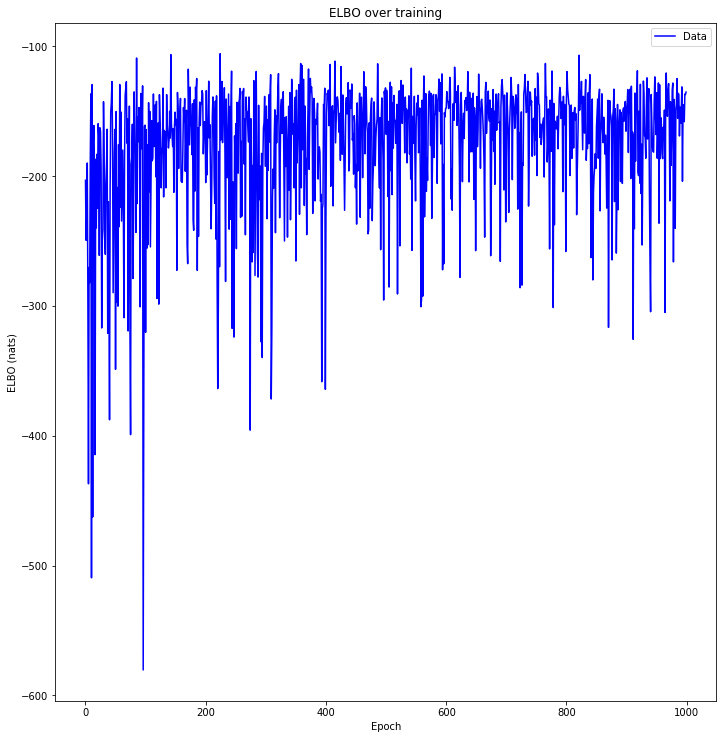

In [13]:
utils.plot_evidence_bounds(elbos)

In [14]:
ssm_smc = mcmc.reduce_resample_move_smc(ssm.SsmStep(batch_shape=particle_shape), lambda: range(50), initializer=init_ssm_proposal, moves=10)

In [15]:
_, inference, _ = ssm_smc(data=data)

In [16]:
for t in range(0, zs.shape[0]-1):
    key = generative.find(lambda k, v: str(t) in k and 'Deterministic' not in k)[0]
    z_t = 'Z_%d' % (t+1)
    accuracy = ((inference[key][z_t].value - utils.optional_to(generative[key][z_t], inference[key][z_t].value))**2).mean()
    print('SMC MSE at time %d: %f' % (t, accuracy))

SMC MSE at time 0: 1.383610
SMC MSE at time 1: 0.847066
SMC MSE at time 2: 2.216154
SMC MSE at time 3: 0.687609
SMC MSE at time 4: 1.116369
SMC MSE at time 5: 2.596035
SMC MSE at time 6: 2.237797
SMC MSE at time 7: 1.111655
SMC MSE at time 8: 0.633936
SMC MSE at time 9: 1.924068
SMC MSE at time 10: 1.368319
SMC MSE at time 11: 1.276263
SMC MSE at time 12: 1.375229
SMC MSE at time 13: 1.248420
SMC MSE at time 14: 0.865895
SMC MSE at time 15: 0.997967
SMC MSE at time 16: 1.530319
SMC MSE at time 17: 1.713949
SMC MSE at time 18: 1.581096
SMC MSE at time 19: 1.282436
SMC MSE at time 20: 0.732239
SMC MSE at time 21: 1.835316
SMC MSE at time 22: 0.602742
SMC MSE at time 23: 1.218074
SMC MSE at time 24: 1.315470
SMC MSE at time 25: 2.430161
SMC MSE at time 26: 2.241798
SMC MSE at time 27: 1.789958
SMC MSE at time 28: 2.428573
SMC MSE at time 29: 0.835406
SMC MSE at time 30: 0.976095
SMC MSE at time 31: 0.912755
SMC MSE at time 32: 2.578109
SMC MSE at time 33: 1.308331
SMC MSE at time 34: 2.89

In [17]:
init_ssm_params

"{'delta__loc': 'tensor(0.8916, grad_fn=<CloneBackward>)', 'delta__scale': 'tensor(0.6590, grad_fn=<CloneBackward>)', 'mu__loc': 'tensor(-0.3232, grad_fn=<CloneBackward>)', 'mu__scale': 'tensor(0.4055, grad_fn=<CloneBackward>)', 'sigma__loc': 'tensor(-0.0028, grad_fn=<CloneBackward>)', 'sigma__scale': 'tensor(1.4786, grad_fn=<CloneBackward>)'}"